In [1]:
import torch
import matplotlib.pyplot as plt
from data_stuff.dataset import SimulationDataset
from networks.losses import PhysicalLossV2

%reload_ext autoreload
%autoreload 2

In [2]:
path_prefix = "/scratch/sc/pillerls/datasets_prepared/"
dataset = SimulationDataset(path_prefix + "plume_extension_training_vary_perm_len_128")

# x, y = dataset[0]
# mat = y
# for i in range(1, len(dataset)):
#     x, y = dataset[i]
#     mat = torch.cat((mat, y))
# num_sample, n, m  = mat.shape
# mat_reshape = mat.reshape((num_sample, n * m)).swapaxes(0,1)
# U, S, Vh = torch.linalg.svd(mat_reshape, full_matrices=False)

x, _ = dataset[0]
mat = x[0:2].unsqueeze(0)
for i in range(1, len(dataset)):
    x, _ = dataset[i]
    mat = torch.cat((mat, x[0:2].unsqueeze(0)))
num_sample, dim, n, m  = mat.shape
mat_reshape = mat.reshape((num_sample, dim * n * m))
mat_reshape = mat_reshape.swapaxes(0,1)
U, S, Vh = torch.linalg.svd(mat_reshape, full_matrices=False)

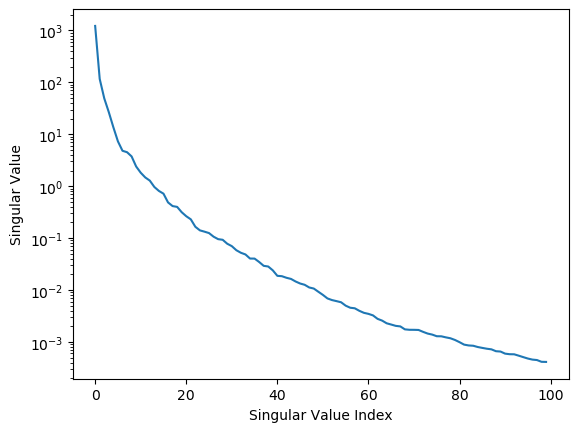

600


In [3]:
settings_pic = {"format": "png",
                "dpi": 600,}

plt.plot(S[:100])
#plt.xscale('log')
plt.yscale('log')
plt.xlabel('Singular Value Index')
plt.ylabel('Singular Value')
#plt.savefig("singular_values.png",**settings_pic)
plt.show()
print(len(S))

In [7]:
num_sing = 100
mat_k = (U[:, 0:num_sing] @ torch.diag_embed(S[0:num_sing]) @ Vh[0:num_sing, :]).swapaxes(0,1)
mat_k_reshape = mat_k.reshape((num_sample, 2, n, m ))
torch.dist(mat_reshape, mat_k.swapaxes(0,1))

tensor(0.0058)

In [8]:
sample = 100
mat_sample_unnorm = dataset.norm.reverse(mat[sample].unsqueeze(0), "Labels")
mat_k_sample_unnorm = dataset.norm.reverse(mat_k_reshape[sample].unsqueeze(0), "Labels")

IndexError: index 1 is out of bounds for dimension 0 with size 1

In [19]:
physicalLoss = PhysicalLossV2("cpu")
inputs, _ = dataset[sample]
inputs = dataset.norm.reverse(inputs, "Inputs")
energy_residual = physicalLoss.get_energy_error(mat_sample_unnorm, inputs[1].unsqueeze(0), inputs[2].unsqueeze(0), 5.0).squeeze()
continuity_residual = physicalLoss.get_continuity_error(mat_sample_unnorm, inputs[1].unsqueeze(0), inputs[2].unsqueeze(0), 5.0).squeeze()
energy_residual_k = physicalLoss.get_energy_error(mat_k_sample_unnorm, inputs[1].unsqueeze(0), inputs[2].unsqueeze(0), 5.0).squeeze()
continuity_residual_k = physicalLoss.get_continuity_error(mat_k_sample_unnorm, inputs[1].unsqueeze(0), inputs[2].unsqueeze(0), 5.0).squeeze()

TypeError: get_energy_error() missing 1 required positional argument: 'cell_width'

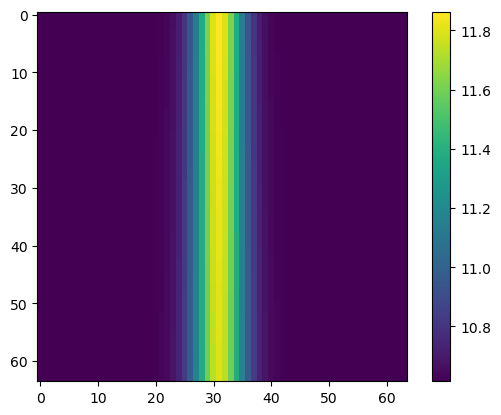

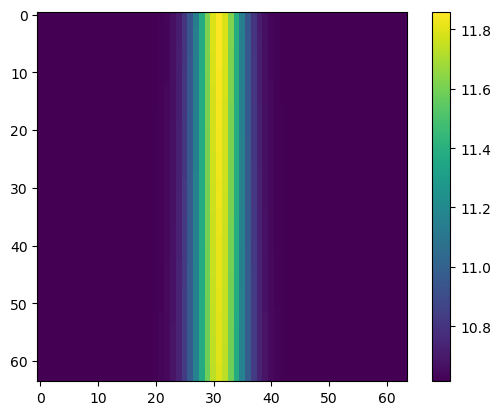

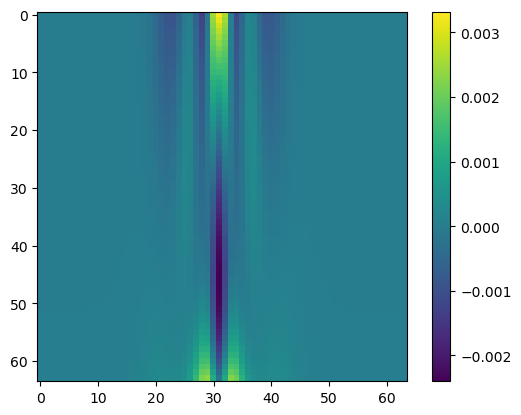

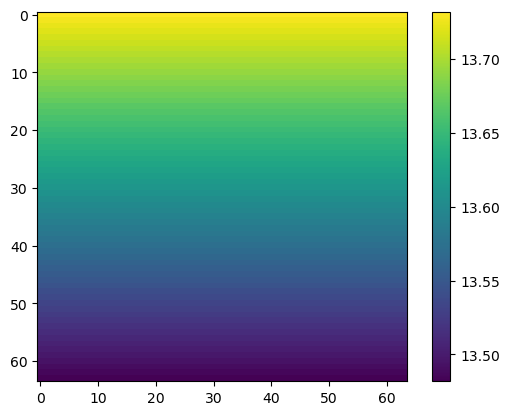

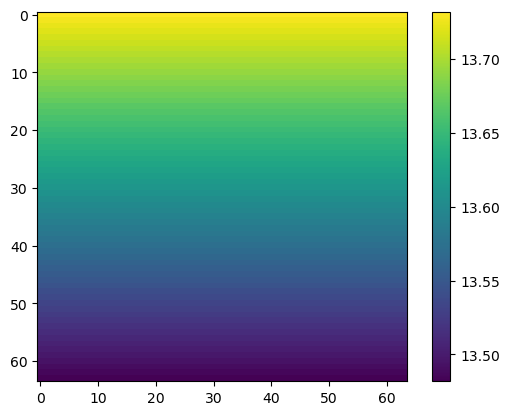

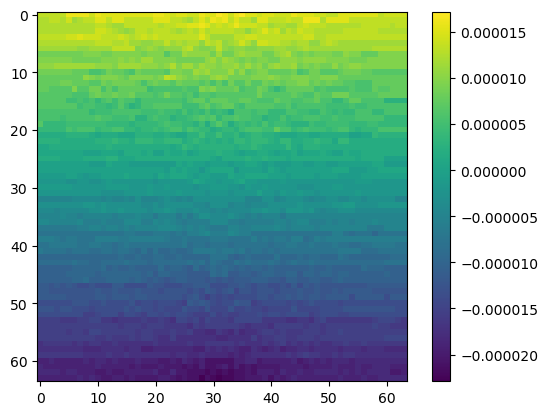

In [16]:
plt.imshow(mat_sample_unnorm.squeeze()[0])
plt.colorbar()
plt.show()
plt.imshow(mat_k_sample_unnorm.squeeze()[0])
plt.colorbar()
plt.show()
plt.imshow(mat_sample_unnorm.squeeze()[0] - mat_k_sample_unnorm.squeeze()[0])
plt.colorbar()
plt.show()
plt.imshow(mat_sample_unnorm.squeeze()[1])
plt.colorbar()
plt.show()
plt.imshow(mat_k_sample_unnorm.squeeze()[1])
plt.colorbar()
plt.show()
plt.imshow(mat_sample_unnorm.squeeze()[1] - mat_k_sample_unnorm.squeeze()[1])
plt.colorbar()
plt.show()
# plt.imshow(energy_residual)
# plt.colorbar()
# plt.show()
# plt.imshow(energy_residual_k)
# plt.colorbar()
# plt.show()
# plt.imshow(continuity_residual)
# plt.colorbar()
# plt.show()
# plt.imshow(continuity_residual_k)
# plt.colorbar()
# plt.show()

Singular vlaue: 0


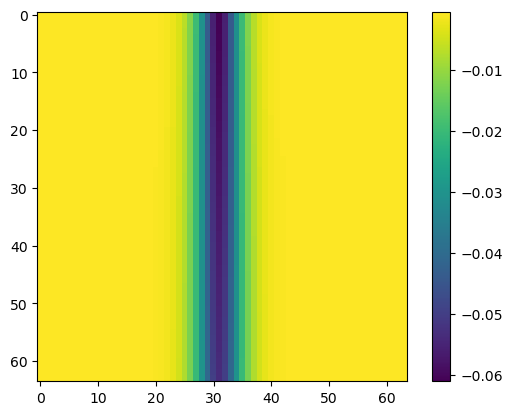

Singular vlaue: 1


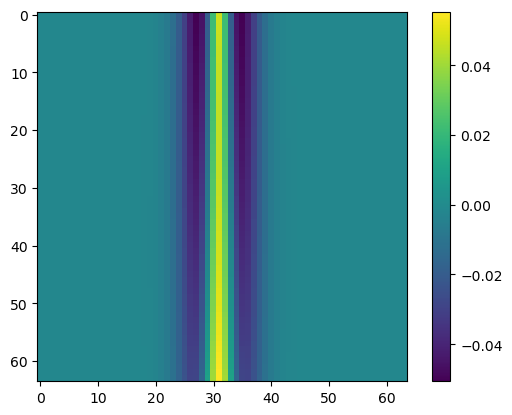

Singular vlaue: 2


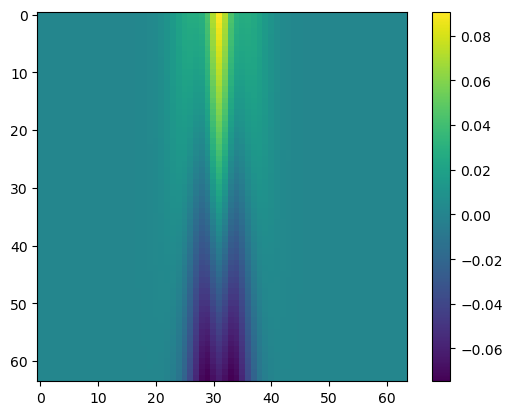

Singular vlaue: 3


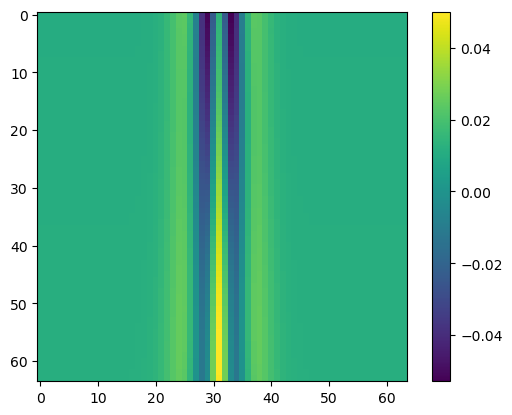

Singular vlaue: 4


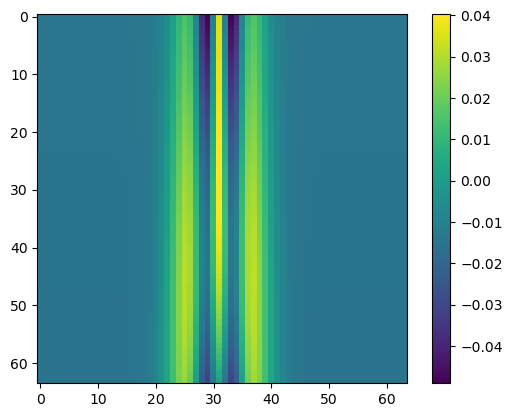

Singular vlaue: 5


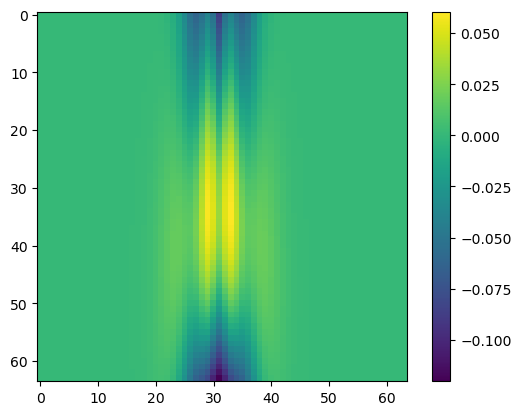

Singular vlaue: 6


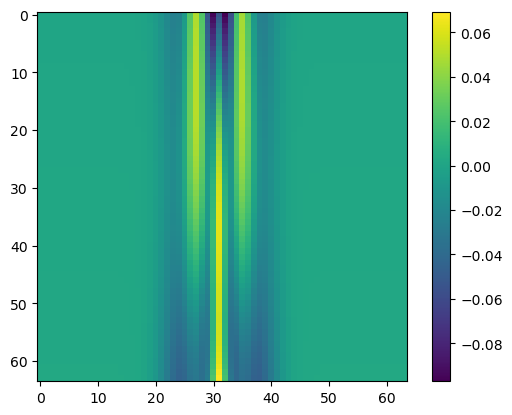

Singular vlaue: 7


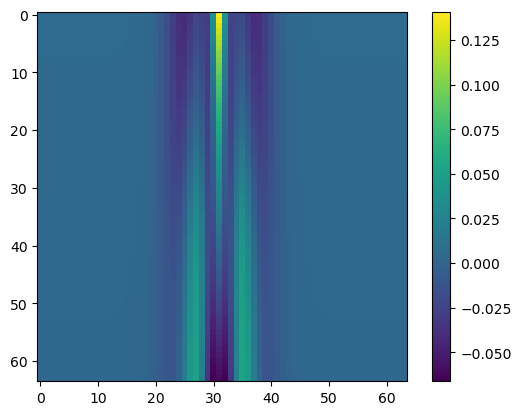

Singular vlaue: 8


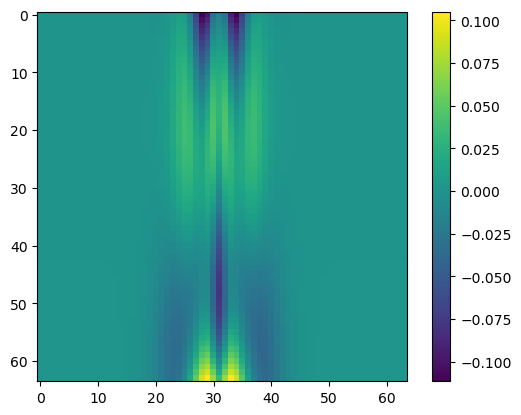

Singular vlaue: 9


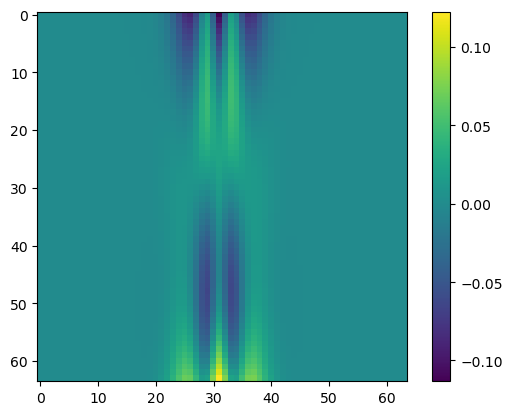

Singular vlaue: 10


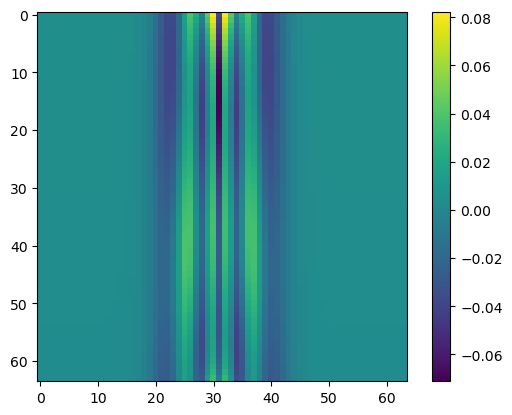

Singular vlaue: 11


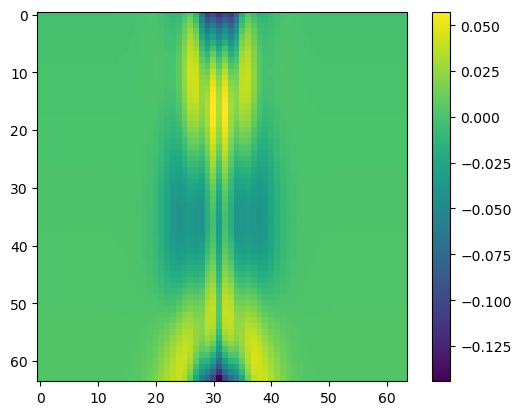

Singular vlaue: 12


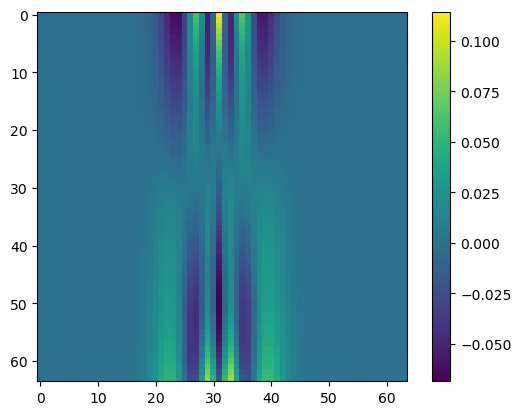

Singular vlaue: 13


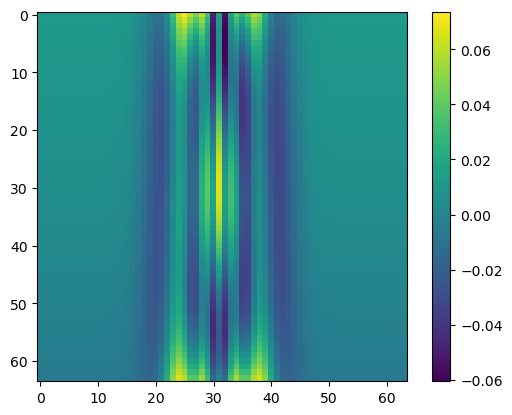

Singular vlaue: 14


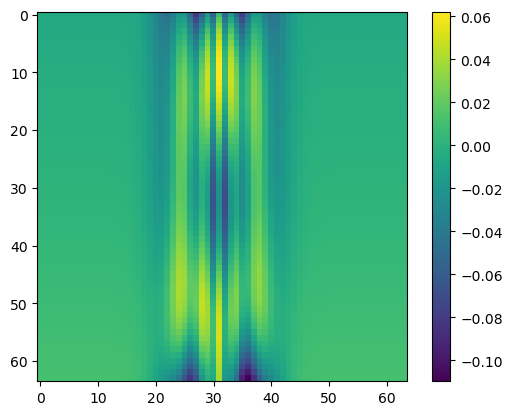

Singular vlaue: 15


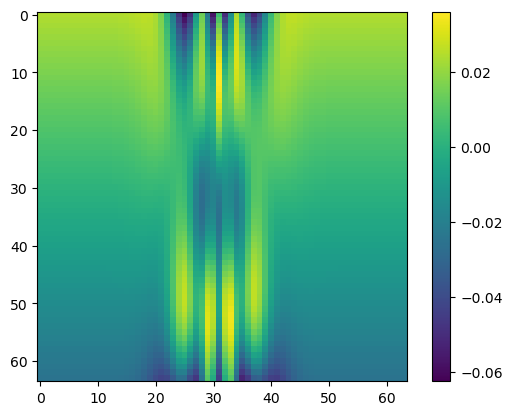

Singular vlaue: 16


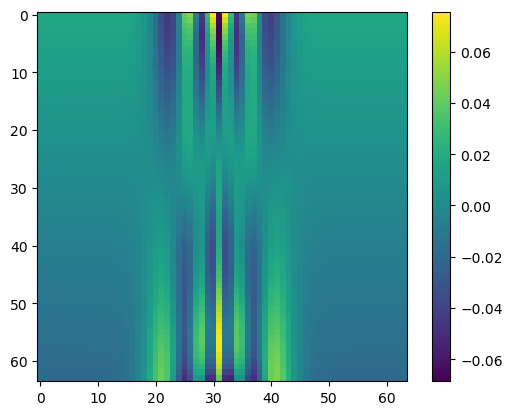

Singular vlaue: 17


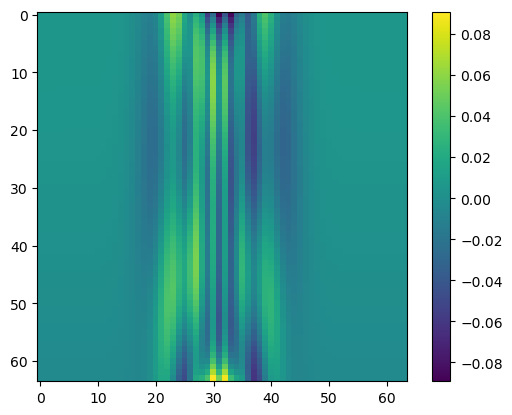

Singular vlaue: 18


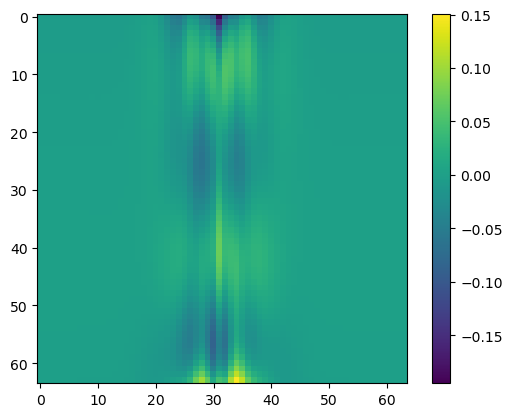

Singular vlaue: 19


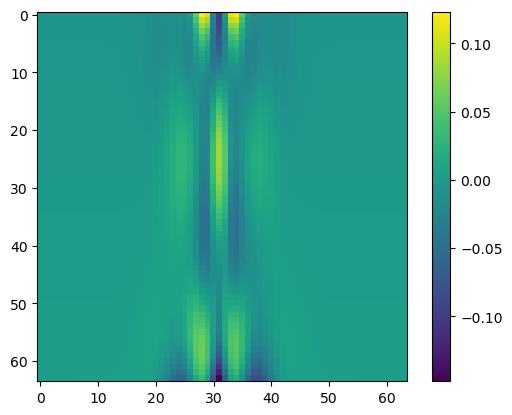

In [68]:
num_sing = 20
for i in range(num_sing):
    x = U[:, i].reshape((n, m))
    print("Singular vlaue: " + str(i))
    plt.imshow(x)
    plt.colorbar()
    plt.show()